# MSDS 458: Research/Programming Assignment #4 (Final Assignment): Part 2

**Management Problem**

For this final research assignment, I apply deep learning methods that we covered in the course (MSDS 458) to conduct sentiment analysis of Twitter data, a challenging yet important field of study for organizations in both public and private sectors. Twitter is a popular platform where entities at all levels—governments, businesses, country leaders, celebrities, and even the average social media user—express their opinions. The content of such tweets could represent a country's official policy or collectively, a country's public sentiment toward a particular issue. Given the massive volume of tweets generated each day—on average, [6,000 tweets are posted on Twitter every second](https://www.internetlivestats.com/twitter-statistics/) —there is immense value in being able quickly and accurately determine such sentiment values (e.g., positive or negative). I combine natural language processing (NLP) and deep learning techniques to build a robust Twitter sentiment classification model. 

**Corpus Description**

The corpus I use is Stanford University's [Sentiment140](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). The dataset is a CSV file consisting of 1.6 million English-language tweets. The tweets are annotated using six attributes: 1. polarity of the tweet (0 = negative, 2 = neutral, 4 = positive); 2. ID; 3. date; 4. query; 5. username; 6. text.  For this project, I plan to use the polarity and text content to build a model that could take any given tweet and determine the most probable sentiment value.

**Methods**

***Text Preprocessing & Data Exploration***
<p>Given the massive number of documents in the corpus (one tweet = one document), it is important to ensure the data, particularly each tweet's text, is cleaned and tokenized properly for any follow-on modeling tasks. Regular expressions are useful in handling any emoticons or special characters (e.g., @ symbols and hashtags). As part of the data exploration step, I also generate visualizations using histograms and word clouds representing various aspects of the tweets (e.g., text content, null values, positive/negative/neutral breakdown, etc.) to gain a broad understanding of both qualitative and quantitative aspects of the corpus.</p>

***Text Vectorization***
<p>While the focus of this project is evaluating optimal deep neural network (DNN) architectures and parameters for Twitter sentiment analysis, such work is dependent on proper experimentation and implementation of various text vectorization methods. I leverage the techniques I learned in MSDS 453 for this task, which include applying word embedding approaches such as TF-IDF and Doc2vec. Since there are 1.6 million documents, it is important for me to limit the vocabulary by tuning the vectorizer hyperparameters (e.g., max_features, max_df) and exploring dimensionality reduction techniques, such as PCA.</p>
<p>I evaluate the vectors using various classifiers to ensure I have the optimal number of features in training for the classification models. I experiment with both traditional classifiers (e.g., logistic regression, random forest, and ensemble methods) and neural networks.</p>

***Building Neural Network-Based Models***
<p>The main part of this research assignment entails careful experimentation of various DNNs we covered in MSDS 458, including fully-connected dense networks, recurrent neural networks (RNN), long short-term memory networks (LSTM), and convolutional neural networks (CNN). The neural networks are built using Keras. The evaluation method to determine the best classification model consists of a strict training-and-test regimen using a crossed experimental design (e.g., maintain consistent hyperparameter settings for consistency). Vocabulary size and word embeddings also remain consistent. I experiment with various network structure designs, hyperparameter settings, and model fit methods by taking the input data (i.e., processed tweet text vectors) through single to multiple layers consisting of varying nodes/units across dense networks, RNNs, LSTM networks, and CNNs.</p>

**Evaluation**
<p>I track and compare training/testing times as well as accuracy and loss curves for train, validation, and test datasets to evaluate the deep learning models' performances. I also provide charts and plots summarizing these key metrics to visually capture which neural network structures and models yield the strongest performance, in terms of implementation time and accuracy.</p>

## NOTES

This notebook is a continuation (part 2 of 6) of MSDS 458 Final Assignment. You need access to the clean_tweets.csv file in order to run the following code.

## Data Preparation

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import os

from google.colab import files
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split, validation_curve
from collections import namedtuple
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import utils
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction import text
from time import time

from pprint import pprint
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4')

# Check working directory
!pwd

# Check files in directory
!ls

/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4
clean_tweets.csv
clf_compare_accuracy_summary.csv
cvec_tfidf_accuracy_summary.csv
d2v_model_dbow.doc2vec
d2v_model_dbow.doc2vec.docvecs.vectors_docs.npy
d2v_model_dbow.doc2vec.trainables.syn1neg.npy
d2v_model_dbow.doc2vec.wv.vectors.npy
Data
dbow_cvec_tfidf_accuracy_summary.csv
dmm_dbow_cvec_tfidf_accuracy_summary.csv
glove.twitter.27B
model_cnn1a.h5
model_cnn1b.h5
model_cnn1c.h5
model_cnn1.h5
model_cnn2.h5
model_cnn3.h5
model_cnn4.h5
model_dnn1.h5
model_dnn2.h5
model_dnn3.h5
model_lstm1.h5
model_lstm2.h5
model_lstm3.h5
model.png
model_rnn1.h5
model_rnn2.h5
model_rnn3.h5
ngram_accuracy_comparison_plot.png
results1.pkl
results2.pkl
results2_v2.pkl
results2_v3.pkl
results3.csv
results3.pkl
results4.csv
results4.pkl
results5.csv
results5.pkl
tfidf_lr_final_eval.csv
tfidf_lr_final_eval.pkl


In [0]:
df = pd.read_csv('clean_tweets.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


## EDA

Generating negative/positive word clouds. These word clouds are based on term frequency.

In [0]:
from wordcloud import WordCloud

In [0]:
neg_tweets = df[df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

Word cloud of all negative tweets

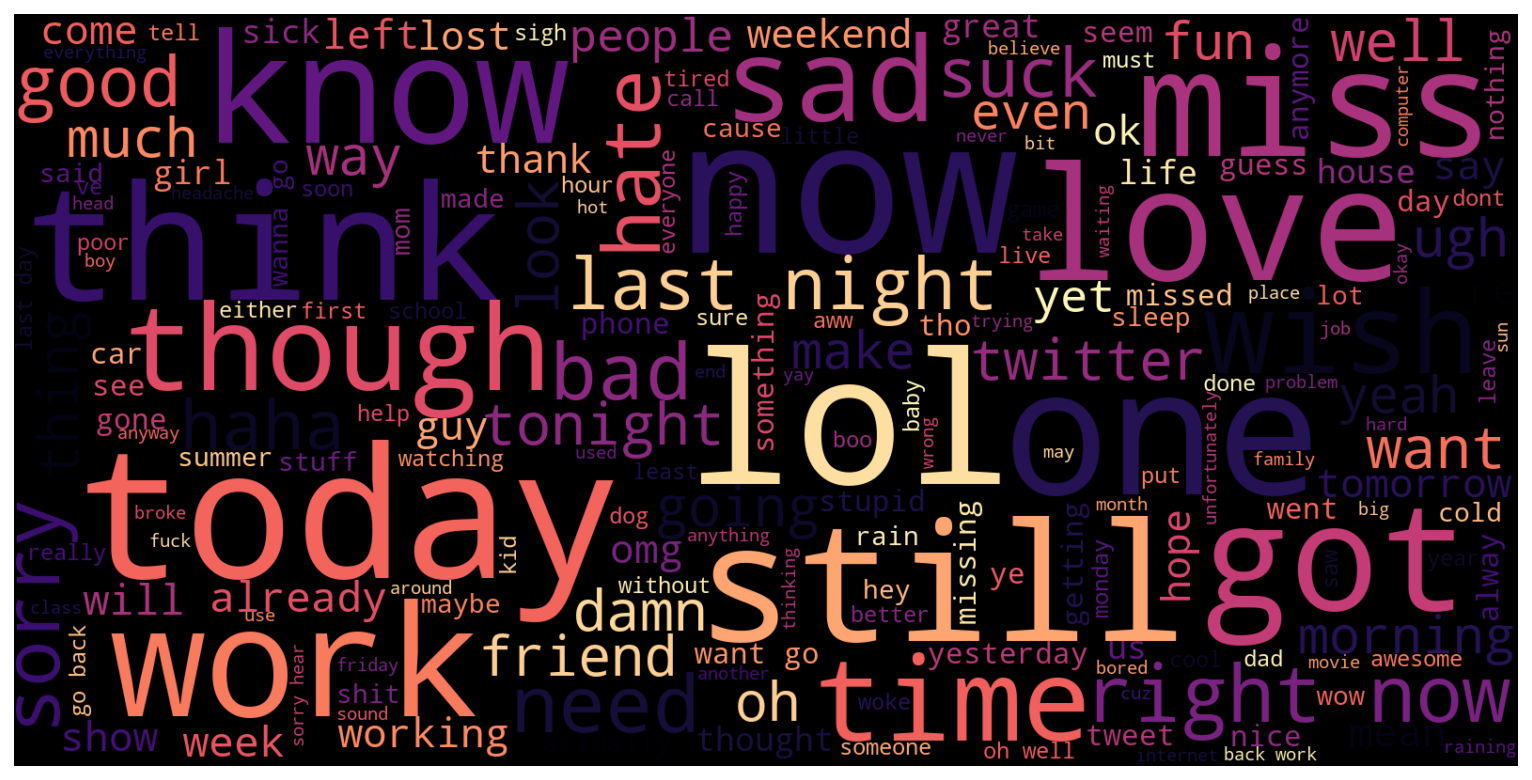

In [0]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
pos_tweets = df[df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

Word cloud of all positive tweets

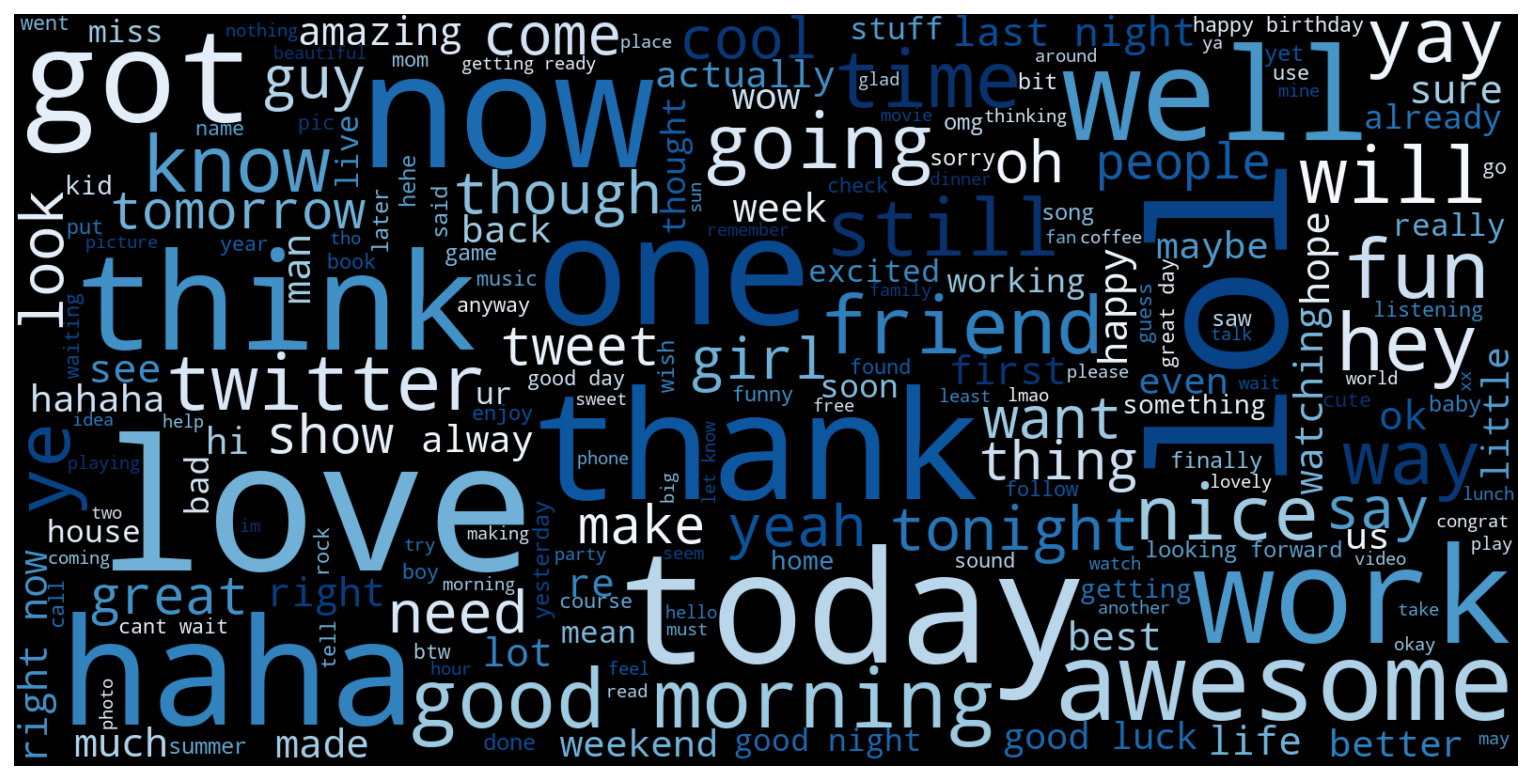

In [0]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='Blues').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Feature Extraction

Note on parameters for vectorization methods

A couple things to note about the parameters for the following document vectorization methods:

*   **max_df**: this is the maximum frequency within the documents a given feature can have to be used in the matrix. If the term is in greater than 80% of the documents it probably carries little meaning (in the context of the article)
*  **min_idf**: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning.
*   **ngram_range**: this just means I'll look at unigrams, bigrams and trigrams. See n-grams 

**Alternative Explanation**

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

*   max_df = 0.50 means "ignore terms that appear in more than 50% of the  documents".
*   max_df = 25 means "ignore terms that appear in more than 25 documents".

The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

**min_df** is used for removing terms that appear too infrequently. For example:

*   min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
*   min_df = 5 means "ignore terms that appear in less than 5 documents".

The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.


In [0]:
tweets = df.text.tolist()

### Model Training Prep

Train / Dev / Test Split

Given the 1.5 million+ size of the dataset, I will split the data into training, validation, and test data.

In [0]:
x = df.text
y = df.target

In [0]:
SEED = 5000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [0]:
print("Train set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564120 entries with 50.02% negative tweets, 49.98% positive tweets.
Validation set has total 15960 entries with 49.18% negative tweets, 50.82% positive tweets.
Test set has total 15961 entries with 49.86% negative tweets, 50.14% positive tweets.


### CountVectorizer

In [0]:
cvector = CountVectorizer()
cvector.fit(tweets)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
len(cvector.get_feature_names())

264939

In [0]:
neg_doc_matrix = cvector.transform(df[df.target == 0].text)
pos_doc_matrix = cvector.transform(df[df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvector.get_feature_names()).transpose()

In [0]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [0]:
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


Defining functions that iteratively train and calculate accuracy of the model.

In [0]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("f1 score: {0:.2f}%".format(f1*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time #change accuracy to f1 to output f1 score

In [0]:
cvector = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvector, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print((classifier))
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

#### Feature Extraction

##### Unigram Model

**Stopwords Evaluation**

The following code is to evaluate how well the models perform with/without stopwords. The two conditions are the following:
*  no stop words: data does not include any stopwords
*  stop words: data includes all stop words

In [0]:
%%time
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_nostopwords = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.08%
f1 score: 77.95%
model is 26.26% more accurate than null accuracy
train and test time: 43.42s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.74%
f1 score: 78.55%
model is 26.92% more accurate than null accuracy
train and test time: 47.88s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.83%
f1 score: 78.61%
model is 27.01% more accurate than null accuracy
train and test time: 48.28s
--------------------------------------------------------------------------------
Validation result for 40000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.98%
f1 score: 78.78%
model is 27.16% more accurate than null accuracy
train and test time: 48.96s
--------------------------------------------------------------------------------
Validation result for 50000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.86%
f1 score: 78.66%
model is 27.04% more accurate than null accuracy
train and test time: 48.77s
--------------------------------------------------------------------------------
Validation result for 60000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.78%
f1 score: 78.58%
model is 26.96% more accurate than null accuracy
train and test time: 49.40s
--------------------------------------------------------------------------------
Validation result for 70000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.84%
f1 score: 78.61%
model is 27.02% more accurate than null accuracy
train and test time: 49.36s
--------------------------------------------------------------------------------
Validation result for 80000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.79%
f1 score: 78.58%
model is 26.97% more accurate than null accuracy
train and test time: 50.23s
--------------------------------------------------------------------------------
Validation result for 90000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.72%
f1 score: 78.51%
model is 26.90% more accurate than null accuracy
train and test time: 50.50s
--------------------------------------------------------------------------------
Validation result for 100000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 77.92%
f1 score: 78.69%
model is 27.10% more accurate than null accuracy
train and test time: 51.15s
--------------------------------------------------------------------------------
CPU times: user 10min 17s, sys: 10min 49s, total: 21min 6s
Wall time: 8min 8s


In [0]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_stopwords = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.05%
f1 score: 80.72%
model is 29.23% more accurate than null accuracy
train and test time: 47.40s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.30%
f1 score: 80.95%
model is 29.48% more accurate than null accuracy
train and test time: 50.72s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.38%
f1 score: 80.95%
model is 29.56% more accurate than null accuracy
train and test time: 52.10s
--------------------------------------------------------------------------------
Validation result for 40000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.30%
f1 score: 80.89%
model is 29.48% more accurate than null accuracy
train and test time: 51.74s
--------------------------------------------------------------------------------
Validation result for 50000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.30%
f1 score: 80.93%
model is 29.48% more accurate than null accuracy
train and test time: 52.24s
--------------------------------------------------------------------------------
Validation result for 60000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.43%
f1 score: 81.05%
model is 29.61% more accurate than null accuracy
train and test time: 52.88s
--------------------------------------------------------------------------------
Validation result for 70000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.44%
f1 score: 81.03%
model is 29.62% more accurate than null accuracy
train and test time: 55.01s
--------------------------------------------------------------------------------
Validation result for 80000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.56%
f1 score: 81.15%
model is 29.74% more accurate than null accuracy
train and test time: 54.89s
--------------------------------------------------------------------------------
Validation result for 90000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.45%
f1 score: 81.02%
model is 29.63% more accurate than null accuracy
train and test time: 55.11s
--------------------------------------------------------------------------------
Validation result for 100000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.42%
f1 score: 81.01%
model is 29.60% more accurate than null accuracy
train and test time: 56.39s
--------------------------------------------------------------------------------
CPU times: user 11min 4s, sys: 11min 12s, total: 22min 16s
Wall time: 8min 48s


###### Stopwords (Unigram) Accuracy Plot

**matplotlib.legend location options**

Location String + Location Code
*  'best' 	0
*  'upper right' 	1
*  'upper left' 	2
*  'lower left' 	3
*  'lower right' 	4
*  'right' 	5
*  'center left' 	6
*  'center right' 	7
*  'lower center' 	8
*  'upper center' 	9
*  'center' 	10

Plotting stopwords evaluation accuracy results

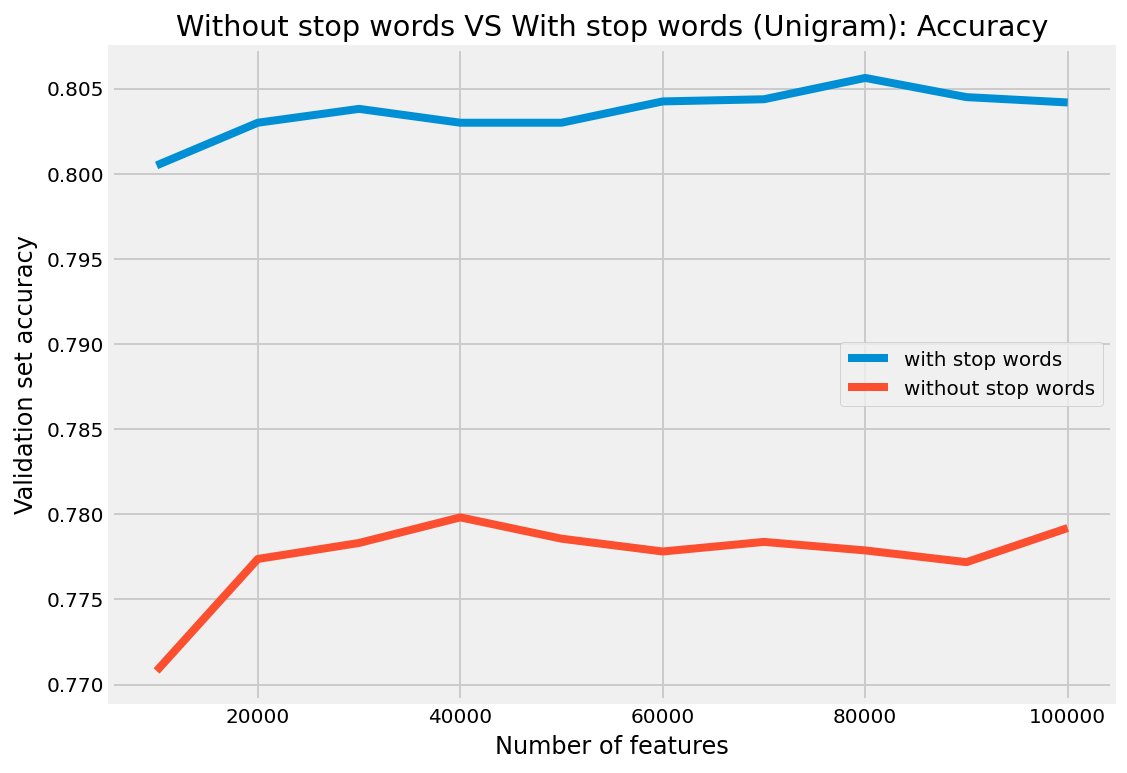

In [0]:
nfeatures_plot_stopwords = pd.DataFrame(feature_result_stopwords,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_nostopwords = pd.DataFrame(feature_result_nostopwords,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_stopwords.nfeatures, nfeatures_plot_stopwords.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_nostopwords.nfeatures, nfeatures_plot_nostopwords.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend(loc = 7)

**Note on stop words**

Based on the unigram model evaluation with and without stop words, it was clear that models that included stop words resulted in significantly higher accuracy. Therefore, moving forward, I will only use models that include stop words.

##### Bigram Model

In [0]:
%%time
print("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bigram = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 81.27%
f1 score: 81.97%
model is 30.44% more accurate than null accuracy
train and test time: 93.54s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 81.90%
f1 score: 82.45%
model is 31.08% more accurate than null accuracy
train and test time: 100.10s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.09%
f1 score: 82.65%
model is 31.27% more accurate than null accuracy
train and test time: 100.62s
--------------------------------------------------------------------------------
Validation result for 40000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.43%
f1 score: 82.94%
model is 31.61% more accurate than null accuracy
train and test time: 102.40s
--------------------------------------------------------------------------------
Validation result for 50000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.43%
f1 score: 82.93%
model is 31.61% more accurate than null accuracy
train and test time: 102.20s
--------------------------------------------------------------------------------
Validation result for 60000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.34%
f1 score: 82.85%
model is 31.52% more accurate than null accuracy
train and test time: 105.07s
--------------------------------------------------------------------------------
Validation result for 70000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.28%
f1 score: 82.78%
model is 31.46% more accurate than null accuracy
train and test time: 106.68s
--------------------------------------------------------------------------------
Validation result for 80000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.42%
f1 score: 82.93%
model is 31.60% more accurate than null accuracy
train and test time: 107.26s
--------------------------------------------------------------------------------
Validation result for 90000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.36%
f1 score: 82.83%
model is 31.54% more accurate than null accuracy
train and test time: 107.44s
--------------------------------------------------------------------------------
Validation result for 100000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.49%
f1 score: 82.98%
model is 31.67% more accurate than null accuracy
train and test time: 107.81s
--------------------------------------------------------------------------------
CPU times: user 19min 33s, sys: 11min 47s, total: 31min 21s
Wall time: 17min 13s


##### Trigram Model

In [0]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_trigram = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 81.06%
f1 score: 81.77%
model is 30.24% more accurate than null accuracy
train and test time: 177.01s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 81.93%
f1 score: 82.51%
model is 31.11% more accurate than null accuracy
train and test time: 185.40s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.21%
f1 score: 82.78%
model is 31.39% more accurate than null accuracy
train and test time: 187.15s
--------------------------------------------------------------------------------
Validation result for 40000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.33%
f1 score: 82.87%
model is 31.51% more accurate than null accuracy
train and test time: 186.99s
--------------------------------------------------------------------------------
Validation result for 50000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.54%
f1 score: 83.05%
model is 31.72% more accurate than null accuracy
train and test time: 189.07s
--------------------------------------------------------------------------------
Validation result for 60000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.64%
f1 score: 83.18%
model is 31.82% more accurate than null accuracy
train and test time: 198.46s
--------------------------------------------------------------------------------
Validation result for 70000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.77%
f1 score: 83.26%
model is 31.95% more accurate than null accuracy
train and test time: 202.98s
--------------------------------------------------------------------------------
Validation result for 80000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.66%
f1 score: 83.17%
model is 31.84% more accurate than null accuracy
train and test time: 205.40s
--------------------------------------------------------------------------------
Validation result for 90000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.52%
f1 score: 83.04%
model is 31.70% more accurate than null accuracy
train and test time: 205.70s
--------------------------------------------------------------------------------
Validation result for 100000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.64%
f1 score: 83.18%
model is 31.82% more accurate than null accuracy
train and test time: 205.51s
--------------------------------------------------------------------------------
CPU times: user 34min 27s, sys: 11min 48s, total: 46min 16s
Wall time: 32min 23s


#### Selecting Best Validation Set Accuracy for Each n-gram

Function to take a closer look at best performing number of features with each n-gram model (e.g., unigram, bigram, and trigram). The function reports accuracy, confusion matrix, and classification report.

In [0]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("f1 score: {0:.2f}%".format(f1*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion)
    print("-"*80)
    print("Classification Report\n")
    print(classification_report(y_test, y_pred, target_names=['negative','positive']))

##### Unigram

In [0]:
%%time
unigram_cvector = CountVectorizer(max_features=80000)
unigram_pipeline = Pipeline([
        ('vectorizer', unigram_cvector),
        ('classifier', lr)
    ])
train_test_and_evaluate(unigram_pipeline, x_train, y_train, x_validation, y_validation)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.56%
f1 score: 81.15%
model is 29.74% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6182                1667
positive                1435                6676
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      7849
    positive       0.80      0.82      0.81      8111

    accuracy                           0.81     15960
   macro avg       0.81      0.81      0.81     15960
weighted avg       0.81      0.81      0.81     15960

CPU times: user 1min 10s, sys: 1min 12s, total: 2min 22s
Wall time: 55.5 s


Unigram Accuracy Summary

In [0]:
print('Unigram Accuracy Summary for CountVectorizer')
unigram_cv_accuracy_summary = pd.DataFrame({
    'Method': ['CountVectorizer'],
    'n-gram': ['unigram'],
    'Features': [80000],
    'Accuracy': ['80.56%']
    })
unigram_cv_accuracy_summary

Unigram Accuracy Summary for CountVectorizer


,Method,n-gram,Features,Accuracy
0,CountVectorizer,unigram,80000,80.56%


##### Bigram

In [0]:
%%time
bigram_cvector = CountVectorizer(max_features=100000,ngram_range=(1, 2))
bigram_pipeline = Pipeline([
        ('vectorizer', bigram_cvector),
        ('classifier', lr)
    ])
train_test_and_evaluate(bigram_pipeline, x_train, y_train, x_validation, y_validation)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.49%
f1 score: 82.98%
model is 31.67% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6356                1493
positive                1301                6810
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.83      0.81      0.82      7849
    positive       0.82      0.84      0.83      8111

    accuracy                           0.82     15960
   macro avg       0.83      0.82      0.82     15960
weighted avg       0.83      0.82      0.82     15960

CPU times: user 2min 7s, sys: 1min 15s, total: 3min 22s
Wall time: 1min 51s


Bigram Accuracy Summary

In [0]:
print('Bigram Accuracy Summary for CountVectorizer')
bigram_cv_accuracy_summary = pd.DataFrame({
    'Method': ['CountVectorizer'],    
    'n-gram': ['bigram'],
    'Features': [100000],
    'Accuracy': ['82.49%']
    })
bigram_cv_accuracy_summary

Bigram Accuracy Summary for CountVectorizer


,Method,n-gram,Features,Accuracy
0,CountVectorizer,bigram,100000,82.49%


##### Trigram

In [0]:
%%time
trigram_cvector = CountVectorizer(max_features=70000,ngram_range=(1, 3))
trigram_pipeline = Pipeline([
        ('vectorizer', trigram_cvector),
        ('classifier', lr)
    ])
train_test_and_evaluate(trigram_pipeline, x_train, y_train, x_validation, y_validation)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.77%
f1 score: 83.26%
model is 31.95% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6371                1478
positive                1272                6839
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.83      0.81      0.82      7849
    positive       0.82      0.84      0.83      8111

    accuracy                           0.83     15960
   macro avg       0.83      0.83      0.83     15960
weighted avg       0.83      0.83      0.83     15960

CPU times: user 3min 37s, sys: 1min 17s, total: 4min 54s
Wall time: 3min 24s


Trigram Accuracy Summary

In [0]:
print('Trigram Accuracy Summary for CountVectorizer')
trigram_cv_accuracy_summary = pd.DataFrame({
    'Method': ['CountVectorizer'],    
    'n-gram': ['trigram'],
    'Features': [70000],
    'Accuracy': ['82.77%']
    })
trigram_cv_accuracy_summary

Trigram Accuracy Summary for CountVectorizer


,Method,n-gram,Features,Accuracy
0,CountVectorizer,trigram,70000,82.77%


##### n-gram Accuracy Summary for CountVectorizer

In [0]:
ngram_cv_accuracy_summary = pd.concat([unigram_cv_accuracy_summary, bigram_cv_accuracy_summary, trigram_cv_accuracy_summary])
ngram_cv_accuracy_summary

,Method,n-gram,Features,Accuracy
0,CountVectorizer,unigram,80000,80.56%
0,CountVectorizer,bigram,100000,82.49%
0,CountVectorizer,trigram,70000,82.77%


### TF-IDF Vectorizer

#### Feature Extraction

In [0]:
tfidf_vector = TfidfVectorizer()

##### Unigram Model

In [0]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS (TF-IDF)\n")
feature_result_ug_tfidf = nfeature_accuracy_checker(vectorizer=tfidf_vector)

RESULT FOR UNIGRAM WITH STOP WORDS (TF-IDF)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.09%
f1 score: 80.53%
model is 29.27% more accurate than null accuracy
train and test time: 49.89s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.51%
f1 score: 80.96%
model is 29.69% more accurate than null accuracy
train and test time: 54.61s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.69%
f1 score: 81.10%
model is 29.87% more accurate than null accuracy
train and test time: 52.40s
--------------------------------------------------------------------------------
Validation result for 40000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.52%
f1 score: 80.92%
model is 29.70% more accurate than null accuracy
train and test time: 54.04s
--------------------------------------------------------------------------------
Validation result for 50000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.68%
f1 score: 81.14%
model is 29.86% more accurate than null accuracy
train and test time: 55.86s
--------------------------------------------------------------------------------
Validation result for 60000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.72%
f1 score: 81.18%
model is 29.90% more accurate than null accuracy
train and test time: 56.63s
--------------------------------------------------------------------------------
Validation result for 70000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.61%
f1 score: 81.04%
model is 29.79% more accurate than null accuracy
train and test time: 59.73s
--------------------------------------------------------------------------------
Validation result for 80000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.66%
f1 score: 81.12%
model is 29.84% more accurate than null accuracy
train and test time: 61.51s
--------------------------------------------------------------------------------
Validation result for 90000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.78%
f1 score: 81.22%
model is 29.96% more accurate than null accuracy
train and test time: 59.45s
--------------------------------------------------------------------------------
Validation result for 100000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.66%
f1 score: 81.13%
model is 29.84% more accurate than null accuracy
train and test time: 58.61s
--------------------------------------------------------------------------------
CPU times: user 11min 50s, sys: 12min 3s, total: 23min 53s
Wall time: 9min 22s


##### Bigram Model

In [0]:
%%time
print("RESULT FOR BIGRAM WITH STOP WORDS (TF-IDF)\n")
feature_result_bg_tfidf = nfeature_accuracy_checker(vectorizer=tfidf_vector, ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (TF-IDF)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 81.44%
f1 score: 81.92%
model is 30.62% more accurate than null accuracy
train and test time: 104.72s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.20%
f1 score: 82.60%
model is 31.38% more accurate than null accuracy
train and test time: 110.95s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.29%
f1 score: 82.67%
model is 31.47% more accurate than null accuracy
train and test time: 110.88s
--------------------------------------------------------------------------------
Validation result for 40000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.64%
f1 score: 83.01%
model is 31.82% more accurate than null accuracy
train and test time: 108.17s
--------------------------------------------------------------------------------
Validation result for 50000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.74%
f1 score: 83.11%
model is 31.92% more accurate than null accuracy
train and test time: 107.40s
--------------------------------------------------------------------------------
Validation result for 60000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.71%
f1 score: 83.07%
model is 31.89% more accurate than null accuracy
train and test time: 111.00s
--------------------------------------------------------------------------------
Validation result for 70000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.85%
f1 score: 83.22%
model is 32.03% more accurate than null accuracy
train and test time: 115.17s
--------------------------------------------------------------------------------
Validation result for 80000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.76%
f1 score: 83.10%
model is 31.94% more accurate than null accuracy
train and test time: 114.99s
--------------------------------------------------------------------------------
Validation result for 90000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.06%
f1 score: 83.40%
model is 32.24% more accurate than null accuracy
train and test time: 117.07s
--------------------------------------------------------------------------------
Validation result for 100000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.02%
f1 score: 83.37%
model is 32.20% more accurate than null accuracy
train and test time: 115.89s
--------------------------------------------------------------------------------
CPU times: user 21min 8s, sys: 12min 39s, total: 33min 47s
Wall time: 18min 36s


##### Trigram Model

In [0]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (TF-IDF)\n")
feature_result_tg_tfidf = nfeature_accuracy_checker(vectorizer=tfidf_vector, ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (TF-IDF)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 81.18%
f1 score: 81.67%
model is 30.36% more accurate than null accuracy
train and test time: 195.47s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.20%
f1 score: 82.59%
model is 31.38% more accurate than null accuracy
train and test time: 201.92s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.36%
f1 score: 82.73%
model is 31.54% more accurate than null accuracy
train and test time: 206.69s
--------------------------------------------------------------------------------
Validation result for 40000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.41%
f1 score: 82.82%
model is 31.59% more accurate than null accuracy
train and test time: 200.57s
--------------------------------------------------------------------------------
Validation result for 50000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 82.83%
f1 score: 83.27%
model is 32.01% more accurate than null accuracy
train and test time: 203.72s
--------------------------------------------------------------------------------
Validation result for 60000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.03%
f1 score: 83.39%
model is 32.21% more accurate than null accuracy
train and test time: 206.50s
--------------------------------------------------------------------------------
Validation result for 70000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.01%
f1 score: 83.37%
model is 32.19% more accurate than null accuracy
train and test time: 208.63s
--------------------------------------------------------------------------------
Validation result for 80000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.13%
f1 score: 83.50%
model is 32.31% more accurate than null accuracy
train and test time: 211.92s
--------------------------------------------------------------------------------
Validation result for 90000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.15%
f1 score: 83.54%
model is 32.33% more accurate than null accuracy
train and test time: 213.65s
--------------------------------------------------------------------------------
Validation result for 100000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.09%
f1 score: 83.47%
model is 32.27% more accurate than null accuracy
train and test time: 224.33s
--------------------------------------------------------------------------------
CPU times: user 36min 55s, sys: 12min 57s, total: 49min 52s
Wall time: 34min 33s


#### Selecting Best Validation Set Accuracy for Each n-gram

Function to take a closer look at best performing number of features with each n-gram model (e.g., unigram, bigram, and trigram). The function reports accuracy, confusion matrix, and classification report.

##### Unigram

In [0]:
%%time
unigram_tfidf_vector = TfidfVectorizer(max_features=90000)
unigram_pipeline_tfidf = Pipeline([
        ('vectorizer', unigram_tfidf_vector),
        ('classifier', lr)
    ])
train_test_and_evaluate(unigram_pipeline_tfidf, x_train, y_train, x_validation, y_validation)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 80.78%
f1 score: 81.22%
model is 29.96% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6263                1586
positive                1481                6630
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.81      0.80      0.80      7849
    positive       0.81      0.82      0.81      8111

    accuracy                           0.81     15960
   macro avg       0.81      0.81      0.81     15960
weighted avg       0.81      0.81      0.81     15960

CPU times: user 1min 16s, sys: 1min 19s, total: 2min 35s
Wall time: 60 s


In [0]:
print('Unigram Accuracy Summary for TfidfVectorizer')
unigram_tfidf_accuracy_summary = pd.DataFrame({
    'Method': ['TF-IDF'],
    'n-gram': ['unigram'],
    'Features': [90000],
    'Accuracy': ['80.78%']
    })
unigram_tfidf_accuracy_summary

Unigram Accuracy Summary for TfidfVectorizer


,Method,n-gram,Features,Accuracy
0,TF-IDF,unigram,90000,80.78%


##### Bigram

In [0]:
%%time
bigram_tfidf_vector = TfidfVectorizer(max_features=90000,ngram_range=(1, 2))
bigram_pipeline_tfidf = Pipeline([
        ('vectorizer', bigram_tfidf_vector),
        ('classifier', lr)
    ])
train_test_and_evaluate(bigram_pipeline_tfidf, x_train, y_train, x_validation, y_validation)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.06%
f1 score: 83.40%
model is 32.24% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6465                1384
positive                1319                6792
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.83      0.82      0.83      7849
    positive       0.83      0.84      0.83      8111

    accuracy                           0.83     15960
   macro avg       0.83      0.83      0.83     15960
weighted avg       0.83      0.83      0.83     15960

CPU times: user 2min 16s, sys: 1min 21s, total: 3min 37s
Wall time: 1min 59s


In [0]:
print('Bigram Accuracy Summary for TfidfVectorizer')
bigram_tfidf_accuracy_summary = pd.DataFrame({
    'Method': ['TF-IDF'],
    'n-gram': ['bigram'],
    'Features': [90000],
    'Accuracy': ['83.06%']
    })
bigram_tfidf_accuracy_summary

Bigram Accuracy Summary for TfidfVectorizer


,Method,n-gram,Features,Accuracy
0,TF-IDF,bigram,90000,83.06%


##### Trigram

In [0]:
%%time
trigram_tfidf_vector = TfidfVectorizer(max_features=80000,ngram_range=(1, 3))
trigram_pipeline_tfidf = Pipeline([
        ('vectorizer', trigram_tfidf_vector),
        ('classifier', lr)
    ])
train_test_and_evaluate(trigram_pipeline_tfidf, x_train, y_train, x_validation, y_validation)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.13%
f1 score: 83.50%
model is 32.31% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6456                1393
positive                1299                6812
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.83      0.82      0.83      7849
    positive       0.83      0.84      0.84      8111

    accuracy                           0.83     15960
   macro avg       0.83      0.83      0.83     15960
weighted avg       0.83      0.83      0.83     15960

CPU times: user 3min 51s, sys: 1min 22s, total: 5min 13s
Wall time: 3min 36s


In [0]:
print('Trigram Accuracy Summary for TfidfVectorizer')
trigram_tfidf_accuracy_summary = pd.DataFrame({
    'Method': ['TF-IDF'],
    'n-gram': ['trigram'],
    'Features': [80000],
    'Accuracy': ['83.13%']
    })
trigram_tfidf_accuracy_summary

Trigram Accuracy Summary for TfidfVectorizer


,Method,n-gram,Features,Accuracy
0,TF-IDF,trigram,80000,83.13%


##### n-gram Accuracy Summary for TFidfVectorizer

In [0]:
ngram_tfidf_accuracy_summary = pd.concat(
    [unigram_tfidf_accuracy_summary, 
     bigram_tfidf_accuracy_summary, 
     trigram_tfidf_accuracy_summary])
ngram_tfidf_accuracy_summary

,Method,n-gram,Features,Accuracy
0,TF-IDF,unigram,90000,80.78%
0,TF-IDF,bigram,90000,83.06%
0,TF-IDF,trigram,80000,83.13%


### n-gram Best Accuracy Summary (Countvectorizer vs TF-IDF)

Models using trigrams result in the highest accuracy scores:
*  For Countvectorizer, 70,000 features result in 82.77%.
*  For TF-IDF, 80,000 features result in 83.13%.

In [0]:
ngram_cvec_tfidf_accuracy_summary = pd.concat(
    [ngram_cv_accuracy_summary, 
     ngram_tfidf_accuracy_summary])

ngram_cvec_tfidf_accuracy_summary.to_csv('cvec_tfidf_accuracy_summary.csv', index = False)
ngram_cvec_tfidf_accuracy_summary

,Method,n-gram,Features,Accuracy
0,CountVectorizer,unigram,80000,80.56%
0,CountVectorizer,bigram,100000,82.49%
0,CountVectorizer,trigram,70000,82.77%
0,TF-IDF,unigram,90000,80.78%
0,TF-IDF,bigram,90000,83.06%
0,TF-IDF,trigram,80000,83.13%


### Plotting Accuracy Results (Countvectorizer vs TF-IDF)

NOTE: Must run all previous code to generate plot

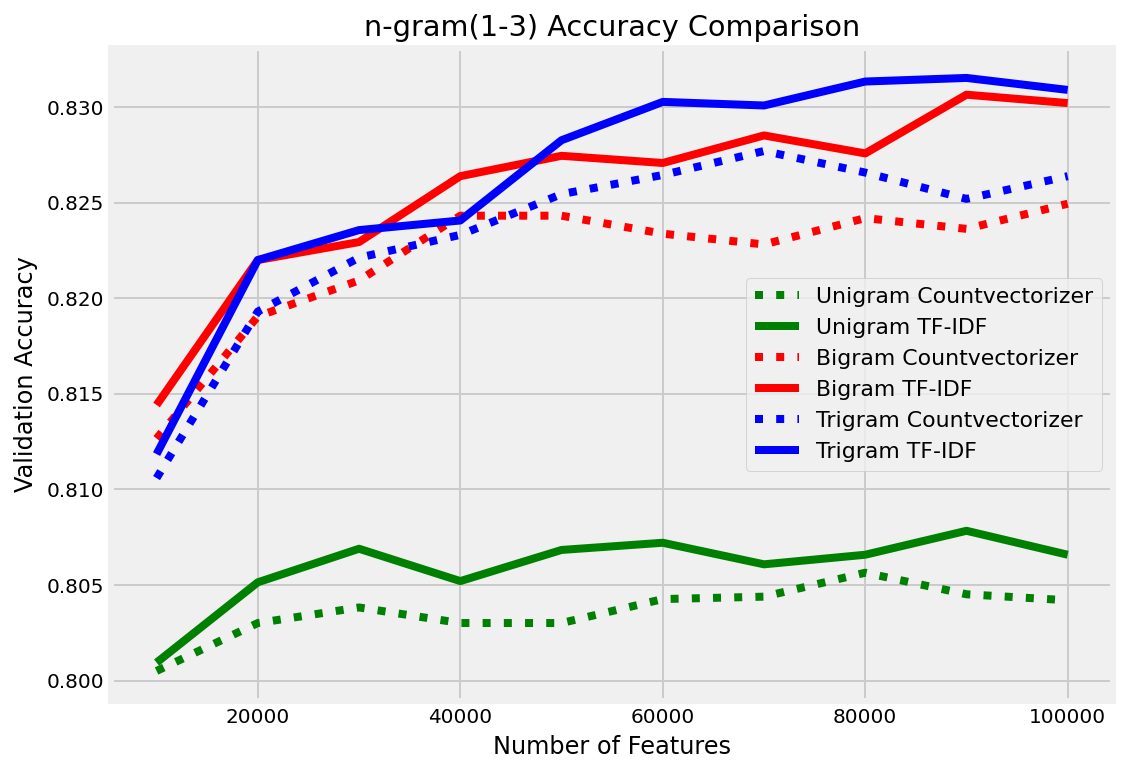

In [0]:
#tfidf results
nfeatures_plot_ug_tfidf = pd.DataFrame(feature_result_ug_tfidf,
                                  columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg_tfidf = pd.DataFrame(feature_result_bg_tfidf,
                                  columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tg_tfidf = pd.DataFrame(feature_result_tg_tfidf,
                                  columns=['nfeatures','validation_accuracy','train_test_time'])

#countvectorization results
nfeatures_plot_bg = pd.DataFrame(feature_result_bigram,
                                  columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tg = pd.DataFrame(feature_result_trigram,
                                  columns=['nfeatures','validation_accuracy','train_test_time'])


plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_stopwords.nfeatures, nfeatures_plot_stopwords.validation_accuracy, label='Unigram Countvectorizer',linestyle=':',color='green')
plt.plot(nfeatures_plot_ug_tfidf.nfeatures, nfeatures_plot_ug_tfidf.validation_accuracy, label='Unigram TF-IDF',color='green')

plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='Bigram Countvectorizer',linestyle=':',color='red')
plt.plot(nfeatures_plot_bg_tfidf.nfeatures, nfeatures_plot_bg_tfidf.validation_accuracy,label='Bigram TF-IDF',color='red')

plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='Trigram Countvectorizer',linestyle=':', color='blue')
plt.plot(nfeatures_plot_tg_tfidf.nfeatures, nfeatures_plot_tg_tfidf.validation_accuracy,label='Trigram TF-IDF',color='blue')

plt.title("n-gram(1-3) Accuracy Comparison")
plt.xlabel("Number of Features")
plt.ylabel("Validation Accuracy")
plt.legend(fontsize = 11, loc = 'center right')
plt.savefig('ngram_accuracy_comparison_plot.png')

### Comparing with Alternative Classifers

In [0]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid

In [0]:
names = ["Logistic Regression", "Linear SVC", "Multinomial NB", "Ridge Classifier", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    MultinomialNB(),
    RidgeClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

#### Validation Scores

In [0]:
tfidf_vector = TfidfVectorizer()

def classifier_compare_val(vectorizer=tfidf_vector, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

Using 80000 features for the classifier comparison since the logistic regression model using a trigram TF-IDF vectorizer yielded the best results.

In [0]:
%%time
classifier_compare_trigram = classifier_compare(n_features=80000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.82%
accuracy score: 83.13%
f1 score: 83.50%
model is 32.31% more accurate than null accuracy
train and test time: 223.58s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
null accuracy: 50.82%
accuracy score: 82.82%
f1 score: 83.22%
model is 32.00% more accurate than null accuracy
train and test time: 229.46s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 50.82%
accuracy score: 80.76%
f1 score: 80.87%
model is 29.94% more accurate than null accuracy
train and test time: 166.51s
-----------------------------------------------------------

#### Test Scores

In [0]:
tfidf_vector = TfidfVectorizer()

def classifier_compare_test(vectorizer=tfidf_vector, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,clf_accuracy,tt_time))
    return result

In [0]:
%%time
classifier_compare_trigram_test = classifier_compare_test(n_features=80000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 50.14%
accuracy score: 81.84%
f1 score: 82.02%
model is 31.70% more accurate than null accuracy
train and test time: 256.59s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
null accuracy: 50.14%
accuracy score: 81.89%
f1 score: 82.18%
model is 31.75% more accurate than null accuracy
train and test time: 261.77s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 50.14%
accuracy score: 79.70%
f1 score: 79.66%
model is 29.56% more accurate than null accuracy
train and test time: 206.34s
-----------------------------------------------------------

#### Classifier Comparison Results Summary

In [0]:
print('Classifier Comparison Accuracy Summmary')
clf_compare_accuracy_summary = pd.DataFrame({
    'Classifier': ['Logistic Regression', 
                   'Linear SVC',
                   'MultinomialNB',
                   'Ridge Classifier',
                   'Nearest Centroid'],
    'Val Accuracy': ['83.13%', 
                 '82.82%',
                 '80.76%',
                 '82.66%',
                 '72.43%'],
    'Test Accuracy': ['81.91%', 
                 '81.89%',
                 '79.70%',
                 '81.62%',
                 '72.96%']

    })

# clf_compare_accuracy_summary.to_csv('clf_compare_accuracy_summary.csv', index = False)
clf_compare_accuracy_summary

Classifier Comparison Accuracy Summmary


,Classifier,Val Accuracy,Test Accuracy
0,Logistic Regression,83.13%,81.91%
1,Linear SVC,82.82%,81.89%
2,MultinomialNB,80.76%,79.70%
3,Ridge Classifier,82.66%,81.62%
4,Nearest Centroid,72.43%,72.96%


In [0]:
clf_compare_accuracy_summary.to_csv('clf_compare_accuracy_summary_v2.csv', index = False)

### Doc2vec

I will be using two models for Doc2vec:
*  Distributed Bag Of Words (PV-DBOW)
*  Distributed Memory Mean (PV-DM)

For both models, not the following parameters:
*  **dm** ({1,0}, optional) – Defines the training algorithm. If dm=1, ‘distributed memory’ (PV-DM) is used. Otherwise, distributed bag of words (PV-DBOW) is employed.
*  **dbow_words** ({1,0}, optional) – If set to 1 trains word-vectors (in skip-gram fashion) simultaneous with DBOW doc-vector training; If 0, only trains doc-vectors (faster).
*  **vector_size** (int, optional) – Dimensionality of the feature vectors.
*  **min_count** (int, optional) – Ignores all words with total frequency lower than this.
*  **negative** (int, optional) – If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.
*  **dm_mean** ({1,0}, optional) – If 0 , use the sum of the context word vectors. If 1, use the mean. Only applies when dm is used in non-concatenative mode.
*  **workers** (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
*  **alpha** (float, optional) – The initial learning rate.
*  **min_alpha** (float, optional) – Learning rate will linearly drop to min_alpha as training progresses.

For more info on Doc2vec, see https://radimrehurek.com/gensim/models/doc2vec.html

Import relevant libraries/packages

In [0]:
from tqdm import tqdm, tqdm_notebook
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence, TaggedDocument
import multiprocessing
from sklearn import utils

In [0]:
cores = multiprocessing.cpu_count()
cores

4

In [0]:
def tag_tweets(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [0]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = tag_tweets(all_x, 'all')

#### DBOW (Distributed Bag of Words)

In [0]:
%%time
model_dbow = Doc2Vec(dm=0, 
                     dbow_words=0, 
                     vector_size=100, 
                     negative=5, 
                     min_count=2, 
                     workers=cores, 
                     alpha=0.065, 
                     min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm_notebook(all_x_w2v)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



CPU times: user 5min 53s, sys: 2.85 s, total: 5min 56s
Wall time: 5min 56s


In [0]:
%%time
for epoch in range(10):
    model_dbow.train(utils.shuffle([x for x in tqdm_notebook(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



CPU times: user 23min 29s, sys: 4min 52s, total: 28min 22s
Wall time: 19min 51s


In [0]:
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

In [0]:
model_dbow.save('d2v_model_dbow.doc2vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Define Vectors

In [0]:
train_vecs_dbow = get_vectors(model_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_dbow, x_validation, 100)

In [0]:
lr_clf = LogisticRegression()
lr_clf.fit(train_vecs_dbow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_clf.score(validation_vecs_dbow, y_validation)

0.7356516290726817

##### Accuracy Summary

In [0]:
print('DBOW Accuracy Summary:')
dbow_accuracy_summary = pd.DataFrame({
    'Method': ['d2v-DBOW'],
    'n-gram': ['unigram'],
    'Features': ['100 (size)'],
    'Accuracy': ['73.57%']
    })
dbow_accuracy_summary

DBOW Accuracy Summary:


,Method,n-gram,Features,Accuracy
0,d2v-DBOW,unigram,100 (size),73.57%


In [0]:
dbow_cvec_tfidf_accuracy_summary = pd.concat(
    [ngram_cvec_tfidf_accuracy_summary, 
     dbow_accuracy_summary])

dbow_cvec_tfidf_accuracy_summary.to_csv('dbow_cvec_tfidf_accuracy_summary.csv', index = False)
dbow_cvec_tfidf_accuracy_summary

,Method,n-gram,Features,Accuracy
0,CountVectorizer,unigram,80000,80.56%
0,CountVectorizer,bigram,100000,82.49%
0,CountVectorizer,trigram,70000,82.77%
0,TF-IDF,unigram,90000,80.78%
0,TF-IDF,bigram,90000,83.06%
0,TF-IDF,trigram,80000,83.13%
0,d2v-DBOW,unigram,100 (size),73.57%


#### DMM (Distributed Memory Mean)

In [0]:
model_dmm = Doc2Vec(dm=1, 
                    dm_mean=1, 
                    vector_size=100, 
                    window=4, 
                    negative=5, 
                    min_count=2, 
                    workers=cores, 
                    alpha=0.065, 
                    min_alpha=0.065)

model_dmm.build_vocab([x for x in tqdm_notebook(all_x_w2v)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
%%time
for epoch in range(10):
    model_dmm.train(utils.shuffle([x for x in tqdm_notebook(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



CPU times: user 53min 4s, sys: 18min 10s, total: 1h 11min 14s
Wall time: 46min 24s


Testing model on common sentiment terms

In [0]:
model_dmm.most_similar('good')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('goood', 0.6177887320518494),
 ('goos', 0.613129734992981),
 ('rough', 0.5873334407806396),
 ('great', 0.5784133672714233),
 ('tough', 0.5565314292907715),
 ('crappy', 0.553972601890564),
 ('gooood', 0.5488114356994629),
 ('bad', 0.539598286151886),
 ('wonderful', 0.5382649898529053),
 ('goooood', 0.5338027477264404)]

In [0]:
model_dmm.most_similar('bad')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('shitty', 0.6047189235687256),
 ('good', 0.539598286151886),
 ('crappy', 0.5243624448776245),
 ('rough', 0.5138473510742188),
 ('looonngg', 0.4986969828605652),
 ('horrible', 0.49272987246513367),
 ('crummy', 0.4831821918487549),
 ('similar', 0.48044243454933167),
 ('terrible', 0.4750298857688904),
 ('goos', 0.467759907245636)]

In [0]:
model_dmm.most_similar('happy')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hppy', 0.5744166374206543),
 ('happpy', 0.5312805771827698),
 ('hapy', 0.5292798280715942),
 ('hepi', 0.5224215984344482),
 ('janell', 0.5149564743041992),
 ('happppy', 0.5134859085083008),
 ('outragous', 0.5058342218399048),
 ('reverence', 0.4999071955680847),
 ('damons', 0.4892587661743164),
 ('thankful', 0.4880753755569458)]

In [0]:
model_dmm.most_similar('angry')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mad', 0.6477954387664795),
 ('irritated', 0.633497953414917),
 ('frustrated', 0.6252307891845703),
 ('annoyed', 0.587624728679657),
 ('upset', 0.5781561136245728),
 ('annoying', 0.5517899394035339),
 ('rude', 0.5485948324203491),
 ('confused', 0.5418930053710938),
 ('pissed', 0.5346008539199829),
 ('unhappy', 0.5334736108779907)]

Define Vectors

In [0]:
train_vecs_dmm = get_vectors(model_dmm, x_train, 100)
validation_vecs_dmm = get_vectors(model_dmm, x_validation, 100)

In [0]:
lr_clf = LogisticRegression()
lr_clf.fit(train_vecs_dmm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_clf.score(validation_vecs_dmm, y_validation)

0.7182957393483709

In [0]:
test_vecs_dmm = get_vectors(model_dmm, x_test, 100)

In [0]:
lr_clf.score(test_vecs_dmm, y_test)

0.7084142597581605

##### Accuracy Summary

In [0]:
print('DMM Accuracy Summary:')
dmm_accuracy_summary = pd.DataFrame({
    'Method': ['d2v-DMM'],
    'n-gram': ['unigram'],
    'Features': ['100 (size)'],
    'Accuracy': ['71.83%']
    })
dmm_accuracy_summary

DMM Accuracy Summary:


,Method,n-gram,Features,Accuracy
0,d2v-DMM,unigram,100 (size),71.83%


### Combined Accuracy Summary

In [0]:
dmm_dbow_cvec_tfidf_accuracy_summary = pd.concat(
    [dbow_cvec_tfidf_accuracy_summary, 
     dmm_accuracy_summary])

dmm_dbow_cvec_tfidf_accuracy_summary.to_csv('dmm_dbow_cvec_tfidf_accuracy_summary.csv', index = False)
dmm_dbow_cvec_tfidf_accuracy_summary

,Method,n-gram,Features,Accuracy
0,CountVectorizer,unigram,80000,80.56%
0,CountVectorizer,bigram,100000,82.49%
0,CountVectorizer,trigram,70000,82.77%
0,TF-IDF,unigram,90000,80.78%
0,TF-IDF,bigram,90000,83.06%
0,TF-IDF,trigram,80000,83.13%
0,d2v-DBOW,unigram,100 (size),73.57%
0,d2v-DMM,unigram,100 (size),71.83%


## Evaluating TF-IDF + Logistic Regression Classifier (Trigram)

### Test Model

In [0]:
tfidf_vector = TfidfVectorizer(max_features=80000,ngram_range=(1, 3))
tfidf_vector.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=80000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#vectorizing train data
x_train_tfidf = tfidf_vector.transform(x_train)

#vectorizing validation data
x_validation_tfidf = tfidf_vector.transform(x_validation).toarray()

# vectorizing test data
x_test_tfidf = tfidf_vector.transform(x_test).toarray()

In [0]:
%%time
lr_clf = LogisticRegression()
lr_clf.fit(x_train_tfidf, y_train)

CPU times: user 59.6 s, sys: 1min 13s, total: 2min 12s
Wall time: 45.1 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
%%time
lr_clf.score(x_train_tfidf, y_train)

CPU times: user 277 ms, sys: 1.8 ms, total: 278 ms
Wall time: 278 ms


0.8356705367874587

In [0]:
%%time
lr_clf.score(x_validation_tfidf, y_validation)

CPU times: user 2.52 s, sys: 16.5 ms, total: 2.54 s
Wall time: 1.3 s


0.831265664160401

In [0]:
%%time
lr_clf.score(x_test_tfidf, y_test)

CPU times: user 4.4 s, sys: 294 ms, total: 4.69 s
Wall time: 3.13 s


0.8191216089217468

Save Performance to Dataframe

In [0]:
print('TF-IDF Final Eval')
tfidf_lr_final_eval = pd.DataFrame({
    'model': ['TF-IDF + LR'],    
    'val_loss': ['TBD'],
    'val_accuracy': [0.831265],
    'loss': ['TBD'],
    'train_accuracy': [0.835670],
    'test_accuracy': [0.819121],
    'training time (sec)': [45.1 ],
    'testing time (sec)': [3.13]
    })

tfidf_lr_final_eval

TF-IDF Final Eval


,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,TF-IDF + LR,TBD,0.831265,TBD,0.83567,0.819121,45.1,3.13


In [0]:
tfidf_lr_final_eval.to_csv('tfidf_lr_final_eval.csv', index = False)

tfidf_lr_final_eval.to_pickle("tfidf_lr_final_eval.pkl") 